In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Simple and Multiple Linear Regression 

Linear Regression is a method to model the relationship between a dependent variable (target variable) and one (simple) or more (multiple) independent varibales. We will plot the dataset and observe the relationship between variables. We will measure the strength between two variables using the correlation coefficients as well as the quality of the regression model using the mean squared error.

### Importing the libraries

In [0]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

### Exploratory Data Analysis 


In [4]:
# Read the dataset 
df = pd.read_csv('/content/drive/My Drive/MachineLearning/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


The dataset contains the height and weight of 5000 males and 5000 females. 

In [5]:
# Number of unique values in the Gender column
df.Gender.nunique()

2

In [6]:
# Unique values in the Gender column
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

As we can see, the dataframe contains three columns: Gender, Height and Weight. The Gender column has 2 unique values : Male and Female 

In [7]:
df.columns[df.isnull().any()]

Index([], dtype='object')

As we can see, there are no missing values in the dataset 


To better understand the distribution of the weight and height variables, we can plot a histogram showing the frequency of these variables.

Text(0, 0.5, 'Frequency')

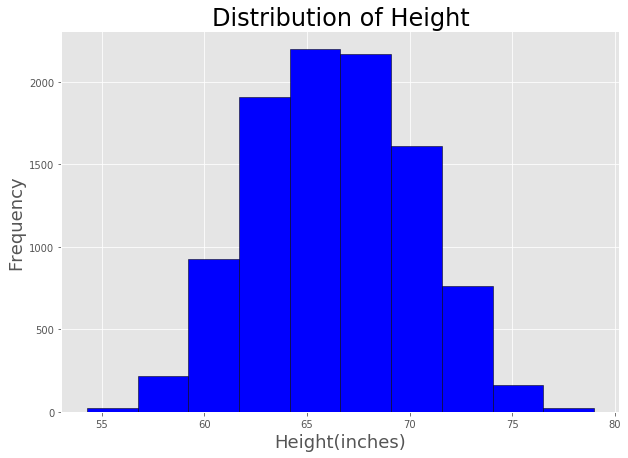

In [8]:
# Histogram of the heights 
df.Height.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height(inches)', size=18)
plt.ylabel('Frequency', size=18)



Text(0, 0.5, 'Frequency')

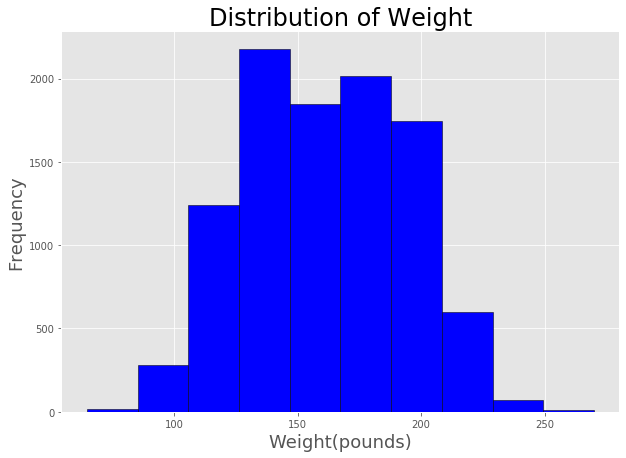

In [9]:
# Histogram of the weights 
df.Weight.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight(pounds)', size=18)
plt.ylabel('Frequency', size=18)


From the above plots, we can infer that both the height and the weight variables are normally distributed. We can use the describe function in Pandas to provide some descriptive statistics of the two features.

In [12]:
# Descriptive statistics male 
statistics_male = df[df['Gender']=='Male'].describe()
statistics_male.rename(columns=lambda x:x+'_male', inplace=True)

# Descriptive statistics female 
statistics_female = df[df['Gender']=='Female'].describe()
statistics_female.rename(columns=lambda x:x+'_female', inplace=True)

# Dataframe that contains both male and female statistics
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics


,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


We will now develop a scatter plot to determine the relationship between two numerical variables. The matplotlib has a built-in function matplotlib.pyplot.scatter() to help with this.

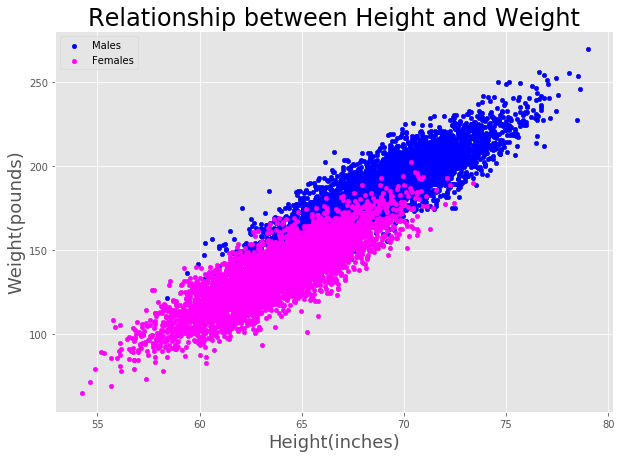

In [15]:
ax1 = df[df['Gender']=='Male'].plot(kind='scatter', x='Height', y='Weight', color='blue',figsize=(10,7))
df[df['Gender']=='Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', figsize=(10,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height(inches)', size=18)
plt.ylabel('Weight(pounds)', size=18)
plt.show()


#### Linear Regression 
Simple Linear Regression is a linear approach to modelling the relationship between a dependent and independent variabl and obtain a line that best fits the data.

### Fitting a linear regression model using sklearn


In [19]:
from sklearn.linear_model import LinearRegression

df_males = df[df['Gender'] == 'Male']

# Create linear regression object

lr_males = LinearRegression()

# Fit Linear Regression 
lr_males.fit(df_males[['Height']], df_males['Weight'])

df_females = df[df['Gender'] == 'Female']
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we have created a model to fit our data, we can make predictions using the predict() method.

In [20]:
lr_females.predict([[60]])

array([113.62953114])

In [21]:
lr_males.predict([[80]])

array([252.44306426])

In [22]:
lr_males.predict([[100]])

array([371.6785405])

### Pearson correlation coefficient 

In [24]:
df_females.corr()

,Height,Weight
Height,1.000000,0.849609
Weight,0.849609,1.000000


In [25]:
df_males.corr()


,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


Interpretation of the correlation coefficient :
  

-    1-0.8 ---> Very Strong
-   0.799-6 ---> Strong
-   0.599-4 ---> Moderate
-   0.399-2 ---> Weak
-   0.199-0 ---> Very Weak

Thus, we can infer that for both males and females, there is a string correlation between the input variables.